In [1]:
import pandas as pd
import glob
import os
import warnings
import matplotlib.pyplot as plt
import matplotlib
from pandas.io.json import json_normalize
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 200)

In [2]:
df=pd.read_csv('Jan 2023.csv')
orders=pd.read_csv('jan orders 23.csv')

In [3]:
orders.rename(columns={'id':'order_id'},inplace=True)

In [4]:
orders

,order_id,amount,amount_paid,amount_due,currency,receipt,offer_id,status,attempts,notes,created_at
0,order_Kz9Le37h2vlsD1,1245.0,1245.0,0.0,INR,NaN,NaN,paid,1,"{""name"": ""Gayathri"", ""email"": ""gasri2004@gmail.com"", ""phone"": ""9820607680"", ""towers"": ""Others"", ""apartment_no"": ""1201""}",02/01/2023 08:20:01
1,order_KzB5XiqIwe9mmA,1045.0,1045.0,0.0,INR,NaN,NaN,paid,1,"{""name"": ""Indrani Jafar"", ""email"": ""ani.doley@gmail.com"", ""phone"": ""9820108861"", ""towers"": ""World One"", ""apartment_no"": ""1001w""}",02/01/2023 10:02:10
2,order_KzBOX3MSqxd0LF,240.0,240.0,0.0,INR,NaN,NaN,paid,1,"{""name"": ""JASMA KAPADIA"", ""email"": ""jasmak999@yahoo.com"", ""phone"": ""9820038207"", ""towers"": ""Lodha Bellissimo"", ""apartment_no"": ""C3102""}",02/01/2023 10:20:08
3,order_KzCy477sRvz9YT,235.0,0.0,235.0,INR,NaN,NaN,created,0,"{""name"": ""Meenal"", ""email"": ""rishabh@earthharvests.com"", ""phone"": ""9819400010"", ""towers"": ""Belvedere Court"", ""apartment_no"": ""25""}",02/01/2023 11:52:28
4,order_KzD0DFOfSI0jbU,235.0,0.0,235.0,INR,NaN,NaN,attempted,1,"{""name"": ""Meenal"", ""email"": ""rishabh@earthharvests.com"", ""phone"": ""9819400010"", ""towers"": ""Belvedere Court"", ""apartment_no"": ""25""}",02/01/2023 11:54:30
...,...,...,...,...,...,...,...,...,...,...,...
93,order_LAH3me32zp1jNn,235.0,0.0,235.0,INR,NaN,NaN,created,0,"{""name"":""Meenal"",""email"":""anish24@gmail.com"",""towers"":""Belvedere Court"",""apartment_no"":""25"",""phone"":""9167612477""}",30/01/2023 11:01:40
94,order_LAH7T7782udoBh,235.0,0.0,235.0,INR,NaN,NaN,attempted,1,"{""name"":""Meenal"",""email"":""anish24@gmail.com"",""towers"":""Belvedere Court"",""apartment_no"":""25"",""phone"":""9167612477""}",30/01/2023 11:05:10
95,order_LAImHCM7cU6nvf,710.0,0.0,710.0,INR,NaN,NaN,attempted,2,"{""name"":""Kerbi Patel "",""email"":""kerbipatel@66.com"",""towers"":""Parsi Colony"",""apartment_no"":""618"",""phone"":""9870410556""}",30/01/2023 12:42:29
96,order_LAdmgGSmd4EGS7,1383.0,1383.0,0.0,INR,NaN,NaN,paid,1,"{""name"":""Sonavi Desai"",""email"":""sonavid@gmail.com"",""towers"":""Vivarea B"",""apartment_no"":""2903"",""phone"":""9820097357""}",31/01/2023 09:15:26


In [5]:
orders['name']=orders['notes'].str.split(',').str[0].str.split('"').str[3]
orders['email']=orders['notes'].str.split(',').str[1].str.split('"').str[3]
orders['phone']=orders['notes'].str.split(',').str[2].str.split('"').str[3]

In [6]:
orders.drop(columns=['amount','amount_paid','amount_due','currency','receipt','offer_id','status','attempts','notes','created_at','phone'],inplace=True)

In [7]:
orders

,order_id,name,email
0,order_Kz9Le37h2vlsD1,Gayathri,gasri2004@gmail.com
1,order_KzB5XiqIwe9mmA,Indrani Jafar,ani.doley@gmail.com
2,order_KzBOX3MSqxd0LF,JASMA KAPADIA,jasmak999@yahoo.com
3,order_KzCy477sRvz9YT,Meenal,rishabh@earthharvests.com
4,order_KzD0DFOfSI0jbU,Meenal,rishabh@earthharvests.com
...,...,...,...
93,order_LAH3me32zp1jNn,Meenal,anish24@gmail.com
94,order_LAH7T7782udoBh,Meenal,anish24@gmail.com
95,order_LAImHCM7cU6nvf,Kerbi Patel,kerbipatel@66.com
96,order_LAdmgGSmd4EGS7,Sonavi Desai,sonavid@gmail.com


In [8]:
combined_data=pd.merge(df,orders,on='order_id',how="left")

In [9]:
combined_data.dropna(subset=['order_id'],inplace=True)

In [10]:
combined_data[combined_data['name'].isnull()]

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount,total payment amount,currency,payment status,payment id,name,email
411,pl_L9fF5d8pBQs7rz,FRUIT BASKET JANUARY 30,01/02/2023 11:41:58,order_LB4oL6Cd5JK9ID,STRAWBERRIES 1 BOX,200.0,1.0,200.0,1490.0,INR,captured,pay_LB4oWYayCnhiZe,NaN,NaN
412,pl_L9fF5d8pBQs7rz,FRUIT BASKET JANUARY 30,01/02/2023 11:41:58,order_LB4oL6Cd5JK9ID,AVOCADOS 2 PCS,675.0,1.0,675.0,1490.0,INR,captured,pay_LB4oWYayCnhiZe,NaN,NaN
413,pl_L9fF5d8pBQs7rz,FRUIT BASKET JANUARY 30,01/02/2023 11:41:58,order_LB4oL6Cd5JK9ID,BLUEBERRIES 2 BOX,600.0,1.0,600.0,1490.0,INR,captured,pay_LB4oWYayCnhiZe,NaN,NaN
414,pl_L9fF5d8pBQs7rz,FRUIT BASKET JANUARY 30,01/02/2023 11:41:58,order_LB4oL6Cd5JK9ID,Delivery,15.0,1.0,15.0,1490.0,INR,captured,pay_LB4oWYayCnhiZe,NaN,NaN


In [11]:
combined_data.rename(columns={'item payment amount':'item payment amount(INR) '},inplace=True)


In [12]:
combined_data_copy=combined_data.copy()

In [13]:
combined_data_copy.tail()

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount(INR),total payment amount,currency,payment status,payment id,name,email
475,pl_L9ffMq6myWa6Gy,"SALADS, EXOTIC VEGETABLES JANUARY 31",30/01/2023 09:47:16,order_LAFk2rTz0w3QwO,S SUMMERCRISP,110.0,1.0,110.0,385.0,INR,captured,pay_LAFn81UkdLjEVr,Ashish Billimoria,billimoriaash@gmail.com
476,pl_L9ffMq6myWa6Gy,"SALADS, EXOTIC VEGETABLES JANUARY 31",30/01/2023 09:47:16,order_LAFk2rTz0w3QwO,BABYCORN 1PACK,65.0,1.0,65.0,385.0,INR,captured,pay_LAFn81UkdLjEVr,Ashish Billimoria,billimoriaash@gmail.com
477,pl_L9ffMq6myWa6Gy,"SALADS, EXOTIC VEGETABLES JANUARY 31",30/01/2023 11:05:19,order_LAH7T7782udoBh,DELIVERY,15.0,1.0,15.0,235.0,INR,failed,pay_LAH7bWXPruNvO4,Meenal,anish24@gmail.com
478,pl_L9ffMq6myWa6Gy,"SALADS, EXOTIC VEGETABLES JANUARY 31",30/01/2023 11:05:19,order_LAH7T7782udoBh,S LETTUCE MIX,110.0,1.0,110.0,235.0,INR,failed,pay_LAH7bWXPruNvO4,Meenal,anish24@gmail.com
479,pl_L9ffMq6myWa6Gy,"SALADS, EXOTIC VEGETABLES JANUARY 31",30/01/2023 11:05:19,order_LAH7T7782udoBh,S ARAGULA,110.0,1.0,110.0,235.0,INR,failed,pay_LAH7bWXPruNvO4,Meenal,anish24@gmail.com


### checking unique values and their count in each columns

In [14]:
combined_data_copy['payment page id'].nunique()

14

In [15]:
combined_data_copy['payment page id'].value_counts()

pl_L42AqPWtHYzgd6    70
pl_L1FnNWclBbwmWt    59
pl_KzA6Gj4yDsgd9B    49
pl_L9ffMq6myWa6Gy    49
pl_L1XDmuH6ffVOIq    46
pl_L78Sb4V8WqjxdI    38
pl_L78RVW2oHyG4UU    35
pl_KzA7oe3nyH72kE    28
pl_L1j2koeQUGNwjc    24
pl_L9fF5d8pBQs7rz    23
pl_KzC9yGe1vB8s1R    20
pl_L8NlH7Nr8zWtAP    17
pl_L42BKUwbO8bXHh    15
pl_L8Nj7HPFeC7i79     6
Name: payment page id, dtype: int64

In [16]:
combined_data_copy['payment page title'].nunique()

14

In [17]:
combined_data_copy['payment page title'].value_counts()

FRUIT BASKET JANUARY 16                 70
FRUIT BASKET JANUARY 9                  59
SALADS, EXOTIC VEGETABLES JANURAY 3     49
SALADS, EXOTIC VEGETABLES JANUARY 31    49
SALADS, EXOTIC VEGETABLES JANUARY 10    46
FRUIT BASKET JANUARY 23                 38
SALADS, EXOTIC VEGETABLES JANUARY 24    35
FRUIT BASKET JANURAY                    28
DRYFRUITS, SEEDS, NUTS JANUARY 25       24
FRUIT BASKET JANUARY 30                 23
DRYFRUITS, SEEDS, NUTS Jan'23           20
FRUIT BASKET JANUARY 27                 17
SALADS, EXOTIC VEGETABLES JANUARY 17    15
DRYFRUITS, SEEDS, NUTS JANUARY 28        6
Name: payment page title, dtype: int64

In [18]:
combined_data_copy['order_id'].nunique()

83

In [19]:
combined_data_copy['payment id'].nunique()

88

In [20]:
df=combined_data_copy.groupby('order_id')['payment id'].nunique().reset_index()
failed_duplets=list(df[df['payment id']>1]['order_id'])
for i in failed_duplets:
    print(combined_data_copy[combined_data_copy['order_id']==i])

       payment page id       payment page title         payment date  \
227  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:31:39   
228  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:31:39   
229  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:31:39   
230  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:31:39   
231  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:31:39   
232  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:31:39   
233  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:29:54   
234  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:29:54   
235  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:29:54   
236  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:29:54   
237  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:29:54   
238  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:29:54   

                 order_id           item name  item amount  ite

In [21]:
values_to_drop = ['pay_L4i2xNpKOsk7Lu','pay_L7T9Q8sIfqdIK1','pay_LAFO2ZDdXZqEFp','pay_LAFm53BgrTX9Wz','pay_LAInJzfAU387H2']

# Drop rows where Gender column has values in the list
combined_data_copy = combined_data_copy[~combined_data_copy['payment id'].isin(values_to_drop)]

In [22]:
df=combined_data_copy.groupby('order_id')['payment id'].nunique().reset_index()
df[df['payment id']>1]



,order_id,payment id


In [23]:
combined_data_copy['item name'].unique()

array(['BROCCOLI 1PC', 'DELIVERY', 'PURPLE CABBAGE 1 PC', 'S ROMAINE',
       'RED YELLOW CAPSICUM 1PC', 'S SWISS CHARD', 'S CURL KALE',
       'S SPICY MIX', 'IMPORTED BLUEBERRIES 2PUNNETS',
       'ICEBERG LETTUCE 1 PC', 'CELERY 250G', 'BABYCORN 1PACK',
       'S LETTUCE MIX', 'S SUMMERCRISP', 'AVOCADOS 2 pcs',
       'CHERRY TOMATOES 250G', 'S ARAGULA', 'S BUTTERHEAD',
       'BUTTON WHITE MUSHROOM 2PACKS', 'JAPANESE CUCUMBER 500G',
       'AVOCADOS 2 PCS', 'NAGPUR ORANGES 1KG', 'Delivery',
       'DESI PAPAYA 1PC', 'REGULAR BANANA 1 DOZ', 'POMEGRANATE 1KG',
       'INDIAN APPLES 1KG', 'STRAWBERRIES 1 BOX', 'BLUEBERRIES 2 BOX',
       'SITAFAL 1KG', 'MOSUMBI LOCAL 1kg', 'MALTA ORANGES 1KG',
       'KIWI BOX', 'MUSKMELON 1PC', 'MAMRA BADAM 500G',
       'PLAIN PISTA 500G', 'CASHEWS 500G', 'BRAZIL NUTS 200G',
       'PRUNES 250G', 'PECAN NUTS 200G', 'WALNUTS 500G',
       'PREMIUM ALMONDS 500G', 'DRIED CRANBERRIES 500G',
       'GOLDEN RASINS 500G', 'JUMBO ANJEER 500G', 'HONEY AWLA 50

In [24]:
combined_data_copy['item name'].value_counts()

Delivery               37
DELIVERY               33
STRAWBERRIES 1 BOX     27
POMEGRANATE 1KG        16
BLUEBERRIES 2 BOX      15
                       ..
MACADAMIA NUTS 200G     1
PINE NUTS 100G          1
PECAN NUTS 200G         1
PLAIN PISTA 500G        1
YELLOW ZUCCHINI 1PC     1
Name: item name, Length: 66, dtype: int64

In [25]:
combined_data_copy['name'].nunique()

44

In [26]:
combined_data_copy['payment status'].nunique()

2

In [27]:
combined_data_copy['payment status'].value_counts()

captured    312
failed      139
Name: payment status, dtype: int64

In [28]:
combined_data_copy['name'].nunique()

44

In [29]:
combined_data_copy['email'].nunique()

34

In [30]:
combined_data_copy['name'].value_counts()

Anish Shah             45
Naina                  28
Indrani Jafar          28
Yogesh Thakkar         27
JASMA KAPADIA          24
Ashish Billimoria      20
Sonavi Desai           16
Meenal                 15
Anubha                 15
Toral patel            14
Michelle Baptist       13
Parvin Dumasia         11
Gayathri               10
Parul kumar            10
Meher Mirza             9
Parul Kumar             9
Naina                   9
Shwetha Kallaje         9
Trupti                  9
Dinmeher Bunshah        8
Kanchan                 8
Kerbi Patel             7
Parul kumar             7
Amirbanu Virji          7
Mridula gupta           7
Ami Gumashta            6
Kanchan samtani         6
Toral Patel             6
Kerbi patel             6
Abha Mehta              6
Namita sahni            5
Shradha Goenka          5
Coolen                  5
Rachna Jain             5
Ushma                   5
Ashish Bilimoria        4
Simeen Oshidar          4
Asha Gopalakrishnan     4
Smita Vats S

In [31]:
combined_data_copy['item quantity'].value_counts()

1.0    410
2.0     38
3.0      3
Name: item quantity, dtype: int64

#### cheching null value count

In [32]:
combined_data_copy.isnull().sum()

payment page id              0
payment page title           0
payment date                 0
order_id                     0
item name                    0
item amount                  0
item quantity                0
item payment amount(INR)     0
total payment amount         0
currency                     0
payment status               0
payment id                   0
name                         4
email                        4
dtype: int64

#### Droping apartment-no ,apartment and currency column

In [33]:
combined_data_copy.drop(columns=['currency'],inplace=True)

In [34]:
(combined_data_copy['payment status'].value_counts()/len(combined_data_copy))*100

captured    69.179601
failed      30.820399
Name: payment status, dtype: float64

In [35]:
combined_data_payment_completed=combined_data_copy

we can drop payment page id column and seggregte titles of item

In [36]:
combined_data_payment_completed.drop(columns=['payment page id'],inplace=True)

In [37]:
#removing payment id as we can get the desired information from orderid
combined_data_payment_completed.drop(columns=['payment id'],inplace=True)

In [38]:
#removing status as we only have successful payments now
combined_data_payment_completed.drop(columns=['payment status'],inplace=True)

In [39]:
dryfruits=combined_data_payment_completed['payment page title'].str.startswith('DRYFRUITS, SEEDS, NUTS')
combined_data_payment_completed.loc[dryfruits,'payment page title']='DRYFRUITS, SEEDS, NUTS'

fruits=combined_data_payment_completed['payment page title'].str.startswith('FRUIT BASKET')
combined_data_payment_completed.loc[fruits,'payment page title']='FRUIT BASKET'

exotic_vegies=combined_data_payment_completed['payment page title'].str.startswith('SALADS, EXOTIC VEGETABLES')
combined_data_payment_completed.loc[exotic_vegies,'payment page title']='SALADS, EXOTIC VEGETABLES'

vegies=combined_data_payment_completed['payment page title'].str.startswith('FORM')
combined_data_payment_completed.loc[vegies,'payment page title']='VEGETABLES'

In [40]:
#seggregating payment page title
combined_data_payment_completed['payment page title'].value_counts()


FRUIT BASKET                 225
SALADS, EXOTIC VEGETABLES    176
DRYFRUITS, SEEDS, NUTS        50
Name: payment page title, dtype: int64

In [41]:
combined_data_payment_completed.columns

Index(['payment page title', 'payment date', 'order_id', 'item name',
       'item amount', 'item quantity', 'item payment amount(INR) ',
       'total payment amount', 'name', 'email'],
      dtype='object')

In [42]:
combined_data_payment_completed['payment date'].value_counts()

24/01/2023 12:22:21    25
24/01/2023 12:35:18    20
19/01/2023 07:24:33    10
14/01/2023 11:02:34    10
09/01/2023 16:52:00     9
                       ..
09/01/2023 17:26:33     2
23/01/2023 16:33:45     2
27/01/2023 10:16:45     1
11/01/2023 08:22:27     1
04/01/2023 12:25:17     1
Name: payment date, Length: 83, dtype: int64

In [43]:

combined_data_payment_completed['payment date']=combined_data_payment_completed['payment date'].astype(str)


In [44]:
combined_data_payment_completed['date']=combined_data_payment_completed['payment date'].str.split().str[0]

In [45]:
combined_data_payment_completed['time']=combined_data_payment_completed['payment date'].str.split().str[1]

In [46]:
combined_data_payment_completed['year']=combined_data_payment_completed['date'].str.split('/').str[2].astype(int)
combined_data_payment_completed['day']=combined_data_payment_completed['date'].str.split('/').str[0].astype(int)
combined_data_payment_completed['month']=combined_data_payment_completed['date'].str.split('/').str[1].astype(int)

In [47]:
combined_data_payment_completed['date'] = pd.to_datetime(combined_data_payment_completed[['year', 'month', 'day']])


In [48]:
combined_data_payment_completed['name'] = combined_data_payment_completed['name'].str.strip().str.lower()

In [49]:
combined_data_payment_completed['item name'] = combined_data_payment_completed['item name'].str.strip().str.lower()
combined_data_payment_completed['email'] = combined_data_payment_completed['email'].str.strip().str.lower()

In [50]:
print("number of days for which we are performing our analysis")
(combined_data_payment_completed['date'].max()-combined_data_payment_completed['date'].min())

number of days for which we are performing our analysis


Timedelta('30 days 00:00:00')

In [53]:
df = pd.DataFrame(combined_data_payment_completed)
df_grouped = df.groupby('name')['email'].first().reset_index()
df_grouped = df_grouped.sort_values(by="name", ascending=True)




display(df_grouped)


,name,email
0,abha mehta,abhamehta26@gmail.com
1,ami gumashta,amigumashta69@gmail.com
2,amirbanu virji,ajvirji@gmail.com
3,anish shah,anish24@gmail.com
4,anubha,sawhney.anubha@gmail.com
5,asha gopalakrishnan,ashagopalakrishnan@hotmail.com
6,ashish billimoria,billimoriaash@gmail.com
7,brinda upadhyaya,ashaforanimal@gmail.com
8,coolen,anish24@gmail.com
9,dinmeher bunshah,anish24@gmail.com


In [52]:
# merged_df = pd.merge(combined_data_payment_completed,df_grouped, on='email', how='left')
# merged_df['name_x'].update(merged_df['name_y'])

# merged_df['name']=merged_df['name_x']

# combined_data_payment_completed=merged_df.drop(columns=['name_x','name_y'])

In [54]:

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'kanchan'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'kanchan samtani'


row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'ashish bilimoria'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'ashish billimoria'

In [55]:
combined_data_payment_completed['email'].nunique()

34

In [56]:
print("Total number of item bought by individuals")
combined_data_payment_completed['name'].value_counts().reset_index(name='number of item purchased(not unique)')

Total number of item bought by individuals


,index,number of item purchased(not unique)
0,anish shah,45
1,naina,37
2,indrani jafar,28
3,yogesh thakkar,27
4,parul kumar,26
5,ashish billimoria,24
6,jasma kapadia,24
7,toral patel,20
8,sonavi desai,16
9,anubha,15


In [57]:
categories=combined_data_payment_completed['payment page title'].unique()
categories_sales=dict()
for category in categories:
    categories_sales[category]=combined_data_payment_completed[combined_data_payment_completed['payment page title']==category]['item payment amount(INR) '].sum()

df = pd.DataFrame(categories_sales.items(), columns=["Category Name", "Amount"])
df_sorted = df.sort_values(by="Amount", ascending=False)
display(df_sorted)
 

,Category Name,Amount
1,FRUIT BASKET,57513.0
2,"DRYFRUITS, SEEDS, NUTS",48115.0
0,"SALADS, EXOTIC VEGETABLES",19284.0


In [58]:
items_amount=combined_data_payment_completed.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
items_amount.sort_values(by='item payment amount(INR) ', ascending=False)

,item name,item payment amount(INR),item quantity
61,walnuts 500g,13860.0,12.0
1,avocados 2 pcs,9750.0,15.0
6,blueberries 2 box,9000.0,15.0
59,strawberries 1 box,7790.0,37.0
30,mamra badam 500g,7120.0,4.0
...,...,...,...
51,s curl kale,330.0,3.0
56,s swiss chard,330.0,3.0
11,celery 250g,280.0,4.0
18,green zucchini 1pc,170.0,2.0


In [59]:
# Sort the DataFrame by date in descending order
df_sorted = combined_data_payment_completed.sort_values(by='date', ascending=False)

# Drop duplicates based on email column, keeping the first occurrence (most recent date)
df_unique = df_sorted.drop_duplicates(subset='email', keep='first')

# Create the DataFrame with 'name', 'email', and 'most_recent_date' columns
df_most_recent = df_unique[['name', 'email', 'date']].rename(columns={'date': 'Most_recent_Purchase_date'})
current_date=combined_data_payment_completed['date'].max()
# Print the resulting DataFrame
df_most_recent['Number of days after Purchase']=current_date-df_most_recent['Most_recent_Purchase_date']
df_most_recent


,name,email,Most_recent_Purchase_date,Number of days after Purchase
411,NaN,NaN,2023-02-01,0 days
430,sonavi desai,sonavid@gmail.com,2023-01-31,1 days
423,naina,naina.sharma@gmail.com,2023-01-31,1 days
449,kerbi patel,kerbipatel@66.com,2023-01-30,2 days
431,ashish billimoria,billimoriaash@gmail.com,2023-01-30,2 days
479,meenal,anish24@gmail.com,2023-01-30,2 days
460,meher mirza,mehermirza123@gmail.com,2023-01-30,2 days
408,parul kumar,2014parulkumar@gmail.com,2023-01-29,3 days
385,anubha,sawhney.anubha@gmail.com,2023-01-27,5 days
396,yogesh thakkar,yogesh.thakkar@gmail.com,2023-01-26,6 days


Text(0.5, 1.0, 'Customers most recent purchase by Date')

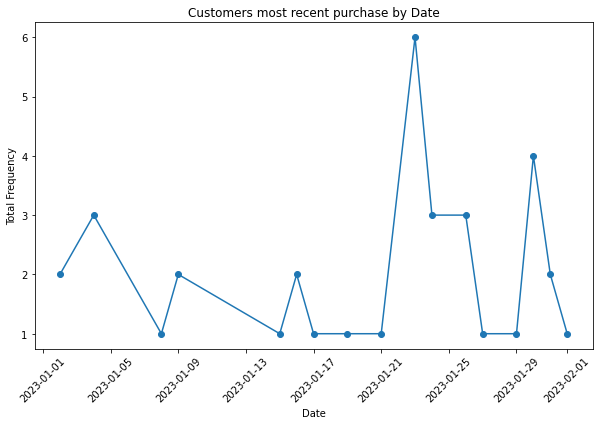

In [60]:
df_freq=df_most_recent.groupby('Most_recent_Purchase_date')['name'].size().reset_index()
# Create a scatter plot or line plot
plt.figure(figsize=(10, 6)) 

# Line plot
plt.plot(df_freq['Most_recent_Purchase_date'], df_freq['name'], marker='o')
plt.xlabel('Date')
plt.ylabel('Total Frequency')
plt.xticks(rotation=45)
plt.title('Customers most recent purchase by Date')

In [61]:
# Sort the DataFrame by date in descending order
df_sorted = combined_data_payment_completed.sort_values(by='date', ascending=True)

# Drop duplicates based on email column, keeping the first occurrence (most recent date)
df_unique = df_sorted.drop_duplicates(subset='email', keep='first')

# Create the DataFrame with 'name', 'email', and 'most_recent_date' columns
df_oldest_date = df_unique[['name', 'email', 'date']].rename(columns={'date': 'oldest_Purchase_date'})
# Print the resulting DataFrame
df_oldest_date

,name,email,oldest_Purchase_date
0,kerbi patel,kerbipatel66@gmail.com,2023-01-02
27,ashish billimoria,billimoriaash@gmail.com,2023-01-02
32,jasma kapadia,jasmak999@yahoo.com,2023-01-02
35,dinmeher bunshah,anish24@gmail.com,2023-01-02
39,michelle baptist,michbaptist@gmail.com,2023-01-02
44,indrani jafar,ani.doley@gmail.com,2023-01-02
23,meenal,rishabh@earthharvests.com,2023-01-02
6,trupti,tmaskai5@gmail.com,2023-01-02
19,kanchan samtani,samtani.kanchan@bcg.com,2023-01-02
60,yogesh thakkar,yogesh.thakkar@gmail.com,2023-01-03


In [62]:
name_amount=combined_data_payment_completed.groupby('name')['item payment amount(INR) '].sum().reset_index()
name_amount=name_amount.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
name_amount.drop(columns='index',inplace=True)
name_amount.head(10)

,name,item payment amount(INR)
0,yogesh thakkar,12499.0
1,jasma kapadia,11475.0
2,indrani jafar,9495.0
3,anish shah,8209.0
4,naina,7139.0
5,parul kumar,6931.0
6,anubha,6768.0
7,amirbanu virji,5690.0
8,namita sahni,5365.0
9,michelle baptist,5190.0


In [63]:
# Group data by 'name' and calculate the number of unique dates for each group
unique_days = combined_data_payment_completed.groupby('name')['date'].nunique().reset_index()

# Rename the column to 'unique_days'
unique_days=unique_days.sort_values(by='date',ascending=False)

unique_days = unique_days.rename(columns={'date': 'Number of times ordered this month','name':'Customer Name'})



unique_days


,Customer Name,Number of times ordered this month
21,naina,5
17,meenal,5
13,jasma kapadia,5
14,kanchan samtani,4
23,parul kumar,4
19,michelle baptist,4
11,indrani jafar,4
0,abha mehta,3
31,sonavi desai,3
4,anubha,3


In [64]:
df_sorted_amount=name_amount.sort_values(by='name')

df_sorted_amount = df_sorted_amount.rename(columns={'name':'Customer Name'})

unique_days=unique_days.sort_values(by='Customer Name')

merged_df = pd.merge(unique_days,df_sorted_amount, on='Customer Name', how='left')

merged_df['amount per order']=merged_df['item payment amount(INR) ']//merged_df['Number of times ordered this month']
df=merged_df.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
df.drop(columns='index',inplace=True)
df.head(10)

,Customer Name,Number of times ordered this month,item payment amount(INR),amount per order
0,yogesh thakkar,2,12499.0,6249.0
1,jasma kapadia,5,11475.0,2295.0
2,indrani jafar,4,9495.0,2373.0
3,anish shah,1,8209.0,8209.0
4,naina,5,7139.0,1427.0
5,parul kumar,4,6931.0,1732.0
6,anubha,3,6768.0,2256.0
7,amirbanu virji,1,5690.0,5690.0
8,namita sahni,1,5365.0,5365.0
9,michelle baptist,4,5190.0,1297.0


In [65]:
top_customer=df.head(10)

top_customer_name=top_customer['Customer Name'].unique()

top_customer_detail=combined_data_payment_completed[combined_data_payment_completed['name'].isin(top_customer_name)]
top_customer_detail_grouped=top_customer_detail.groupby(['name','payment page title'])['item payment amount(INR) '].sum().reset_index()
top_customer_detail_grouped

,name,payment page title,item payment amount(INR)
0,amirbanu virji,"DRYFRUITS, SEEDS, NUTS",5690.0
1,anish shah,FRUIT BASKET,4766.0
2,anish shah,"SALADS, EXOTIC VEGETABLES",3443.0
3,anubha,"DRYFRUITS, SEEDS, NUTS",2310.0
4,anubha,FRUIT BASKET,4458.0
5,indrani jafar,"DRYFRUITS, SEEDS, NUTS",5390.0
6,indrani jafar,FRUIT BASKET,2155.0
7,indrani jafar,"SALADS, EXOTIC VEGETABLES",1950.0
8,jasma kapadia,"DRYFRUITS, SEEDS, NUTS",6680.0
9,jasma kapadia,FRUIT BASKET,4555.0


In [66]:
pivot_table = pd.pivot_table(top_customer_detail_grouped, values='item payment amount(INR) ', index='name', columns='payment page title', aggfunc='sum')

# Rename the columns
pivot_table.columns = ['DRYFRUITS, SEEDS, NUTS', 'FRUIT BASKET', 'SALADS, EXOTIC VEGETABLES']

# Reset the index
pivot_table.reset_index(inplace=True)
pivot_table.fillna(0,inplace=True)
pivot_table['Total Amount(INR) '] = pivot_table['DRYFRUITS, SEEDS, NUTS']+pivot_table['FRUIT BASKET']+pivot_table['SALADS, EXOTIC VEGETABLES']
pivot_table=pivot_table.sort_values(by='Total Amount(INR) ',ascending=False).reset_index()
pivot_table.drop(columns='index',inplace=True)
pivot_table

,name,"DRYFRUITS, SEEDS, NUTS",FRUIT BASKET,"SALADS, EXOTIC VEGETABLES",Total Amount(INR)
0,yogesh thakkar,7715.0,4784.0,0.0,12499.0
1,jasma kapadia,6680.0,4555.0,240.0,11475.0
2,indrani jafar,5390.0,2155.0,1950.0,9495.0
3,anish shah,0.0,4766.0,3443.0,8209.0
4,naina,0.0,6534.0,605.0,7139.0
5,parul kumar,0.0,6931.0,0.0,6931.0
6,anubha,2310.0,4458.0,0.0,6768.0
7,amirbanu virji,5690.0,0.0,0.0,5690.0
8,namita sahni,5365.0,0.0,0.0,5365.0
9,michelle baptist,4410.0,330.0,450.0,5190.0


In [67]:
pivot_table_p=pivot_table
pivot_table_p['FRUIT BASKET(percentage) ']=round(pivot_table_p['FRUIT BASKET']*100/pivot_table_p['Total Amount(INR) '],2)
pivot_table_p['DRYFRUITS, SEEDS, NUTS(percentage) ']=round(pivot_table_p['DRYFRUITS, SEEDS, NUTS']*100/pivot_table_p['Total Amount(INR) '],2)
pivot_table_p['SALADS, EXOTIC VEGETABLES(percentage) ']=round(pivot_table_p['SALADS, EXOTIC VEGETABLES']*100/pivot_table_p['Total Amount(INR) '],2)
pivot_table_p.drop(columns=['DRYFRUITS, SEEDS, NUTS','FRUIT BASKET','SALADS, EXOTIC VEGETABLES'],inplace=True)
pivot_table_p

,name,Total Amount(INR),FRUIT BASKET(percentage),"DRYFRUITS, SEEDS, NUTS(percentage)","SALADS, EXOTIC VEGETABLES(percentage)"
0,yogesh thakkar,12499.0,38.28,61.72,0.00
1,jasma kapadia,11475.0,39.69,58.21,2.09
2,indrani jafar,9495.0,22.70,56.77,20.54
3,anish shah,8209.0,58.06,0.00,41.94
4,naina,7139.0,91.53,0.00,8.47
5,parul kumar,6931.0,100.00,0.00,0.00
6,anubha,6768.0,65.87,34.13,0.00
7,amirbanu virji,5690.0,0.00,100.00,0.00
8,namita sahni,5365.0,0.00,100.00,0.00
9,michelle baptist,5190.0,6.36,84.97,8.67


In [68]:
bottom_customer=df.tail(10)

bottom_customer_name=bottom_customer['Customer Name'].unique()

bottom_customer_detail=combined_data_payment_completed[combined_data_payment_completed['name'].isin(bottom_customer_name)]
bottom_customer_detail_grouped=bottom_customer_detail.groupby(['name','payment page title'])['item payment amount(INR) '].sum().reset_index()
bottom_customer_detail_grouped
pivot_table_bottom = pd.pivot_table(bottom_customer_detail_grouped, values='item payment amount(INR) ', index='name', columns='payment page title', aggfunc='sum')

# # Rename the columns
pivot_table_bottom.columns = ['FRUIT BASKET', 'SALADS, EXOTIC VEGETABLES']

# Reset the index
pivot_table_bottom.reset_index(inplace=True)
pivot_table_bottom.fillna(0,inplace=True)
pivot_table_bottom['Total Amount(INR) '] = pivot_table_bottom['FRUIT BASKET']+pivot_table_bottom['SALADS, EXOTIC VEGETABLES']
pivot_table_bottom=pivot_table_bottom.sort_values(by='Total Amount(INR) ',ascending=False).reset_index()
pivot_table_bottom.drop(columns='index',inplace=True)
pivot_table_bottom

,name,FRUIT BASKET,"SALADS, EXOTIC VEGETABLES",Total Amount(INR)
0,meenal,0.0,1175.0,1175.0
1,asha gopalakrishnan,1163.0,0.0,1163.0
2,jaishankar vg,1045.0,0.0,1045.0
3,meher mirza,0.0,780.0,780.0
4,dinmeher bunshah,0.0,690.0,690.0
5,smita vats sharma,690.0,0.0,690.0
6,coolen,0.0,575.0,575.0
7,abha mehta,0.0,485.0,485.0
8,shradha goenka,0.0,405.0,405.0
9,madhu,0.0,210.0,210.0


In [69]:
top_customer_detail.groupby('name')['item name'].unique().reset_index()

,name,item name
0,amirbanu virji,"[plain pista 500g, cashews 500g, brazil nuts 200g, prunes 250g, pecan nuts 200g, walnuts 500g, premium almonds 500g]"
1,anish shah,"[purple cabbage 1 pc, japanese cucumber 500g, green zucchini 1pc, s lettuce mix, yellow zucchini 1pc, s aragula, s curl kale, s summercrisp, delivery, cherry tomatoes 250g, s spicy mix, italian ba..."
2,anubha,"[pomegranate 1kg, blueberries 2 box, strawberries 1 box, malta oranges 1kg, kiwi box, new zealand queen apples 1kg, red grapes 500g, delivery, beauty pear 1kg, walnuts 500g]"
3,indrani jafar,"[cherry tomatoes 250g, avocados 2 pcs, delivery, broccoli 1pc, japanese cucumber 500g, cashews 500g, mamra badam 500g, makhana 250g, salted pista 500g, pine nuts 100g, beauty pear 1kg, strawberrie..."
4,jasma kapadia,"[button white mushroom 2packs, broccoli 1pc, delivery, kiwi box, blueberries 2 box, strawberries 1 box, new zealand queen apples 1kg, nagpur oranges 1kg, premium almonds 500g, prunes 250g, jumbo a..."
5,michelle baptist,"[s spicy mix, babycorn 1pack, button white mushroom 2packs, red yellow capsicum 1pc, delivery, regular banana 1 doz, strawberries 1 box, walnuts 500g, macadamia nuts 200g, premium jumbo dates 500g..."
6,naina,"[avocados 2 pcs, nagpur oranges 1kg, delivery, desi papaya 1pc, regular banana 1 doz, pomegranate 1kg, indian apples 1kg, strawberries 1 box, cherry tomatoes 250g, button white mushroom 2packs, it..."
7,namita sahni,"[brazil nuts 200g, a2 gir cow ghee 500ml, cashews 500g, mamra badam 500g, walnuts 500g]"
8,parul kumar,"[new zealand queen apples 1kg, desi papaya 1pc, beauty pear 1kg, delivery, elaichi banana 1dozen, pomegranate 1kg, sitafal 1kg, raipur guava 1kg, nagpur oranges 1kg, avocados 2 pcs]"
9,yogesh thakkar,"[strawberries 1 box, delivery, sitafal 1kg, mosumbi local 1kg, avocados 2 pcs, pomegranate 1kg, nagpur oranges 1kg, malta oranges 1kg, dried cranberries 500g, golden rasins 500g, jumbo anjeer 500g..."


In [70]:
top1=top_customer_detail.groupby('name')['item name'].unique().reset_index()
top2=top_customer_detail.groupby('name')['item payment amount(INR) '].sum().reset_index()
merged=pd.merge(top1,top2,on='name',how='left')
merged=merged.sort_values(by="item payment amount(INR) ",ascending=False).reset_index()
merged.drop(columns='index')

,name,item name,item payment amount(INR)
0,yogesh thakkar,"[strawberries 1 box, delivery, sitafal 1kg, mosumbi local 1kg, avocados 2 pcs, pomegranate 1kg, nagpur oranges 1kg, malta oranges 1kg, dried cranberries 500g, golden rasins 500g, jumbo anjeer 500g...",12499.0
1,jasma kapadia,"[button white mushroom 2packs, broccoli 1pc, delivery, kiwi box, blueberries 2 box, strawberries 1 box, new zealand queen apples 1kg, nagpur oranges 1kg, premium almonds 500g, prunes 250g, jumbo a...",11475.0
2,indrani jafar,"[cherry tomatoes 250g, avocados 2 pcs, delivery, broccoli 1pc, japanese cucumber 500g, cashews 500g, mamra badam 500g, makhana 250g, salted pista 500g, pine nuts 100g, beauty pear 1kg, strawberrie...",9495.0
3,anish shah,"[purple cabbage 1 pc, japanese cucumber 500g, green zucchini 1pc, s lettuce mix, yellow zucchini 1pc, s aragula, s curl kale, s summercrisp, delivery, cherry tomatoes 250g, s spicy mix, italian ba...",8209.0
4,naina,"[avocados 2 pcs, nagpur oranges 1kg, delivery, desi papaya 1pc, regular banana 1 doz, pomegranate 1kg, indian apples 1kg, strawberries 1 box, cherry tomatoes 250g, button white mushroom 2packs, it...",7139.0
5,parul kumar,"[new zealand queen apples 1kg, desi papaya 1pc, beauty pear 1kg, delivery, elaichi banana 1dozen, pomegranate 1kg, sitafal 1kg, raipur guava 1kg, nagpur oranges 1kg, avocados 2 pcs]",6931.0
6,anubha,"[pomegranate 1kg, blueberries 2 box, strawberries 1 box, malta oranges 1kg, kiwi box, new zealand queen apples 1kg, red grapes 500g, delivery, beauty pear 1kg, walnuts 500g]",6768.0
7,amirbanu virji,"[plain pista 500g, cashews 500g, brazil nuts 200g, prunes 250g, pecan nuts 200g, walnuts 500g, premium almonds 500g]",5690.0
8,namita sahni,"[brazil nuts 200g, a2 gir cow ghee 500ml, cashews 500g, mamra badam 500g, walnuts 500g]",5365.0
9,michelle baptist,"[s spicy mix, babycorn 1pack, button white mushroom 2packs, red yellow capsicum 1pc, delivery, regular banana 1 doz, strawberries 1 box, walnuts 500g, macadamia nuts 200g, premium jumbo dates 500g...",5190.0


In [71]:
detail_item=top_customer_detail[top_customer_detail['name']=='dinmeher bunshah'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index')

,item name,item payment amount(INR),item quantity


In [91]:
detail_item=top_customer_detail[top_customer_detail['name']=='yogesh thakkar'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index').head(10)

,item name,item payment amount(INR),item quantity
0,walnuts 500g,2310.0,2.0
1,avocados 2 pcs,1300.0,2.0
2,jumbo anjeer 500g,990.0,1.0
3,dried cranberries 500g,950.0,1.0
4,cashews 500g,820.0,1.0
5,premium jumbo dates 500g,815.0,1.0
6,pomegranate 1kg,700.0,2.0
7,strawberries 1 box,630.0,3.0
8,sitafal 1kg,520.0,2.0
9,golden rasins 500g,500.0,1.0


In [89]:
detail_item=top_customer_detail[top_customer_detail['name']=='jasma kapadia'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index')

,item name,item payment amount(INR),item quantity
0,walnuts 500g,2310.0,2.0
1,blueberries 2 box,1800.0,3.0
2,premium almonds 500g,1800.0,2.0
3,jumbo anjeer 500g,990.0,1.0
4,new zealand queen apples 1kg,800.0,2.0
5,avocados 2 pcs,650.0,1.0
6,kiwi box,600.0,3.0
7,turkish apricot 200g,560.0,2.0
8,prunes 250g,520.0,2.0
9,golden rasins 500g,500.0,1.0


### visualization

In [68]:
date_amount=combined_data_payment_completed.groupby('date')['item payment amount(INR) '].sum().reset_index()
date_amount.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR)
17,2023-01-24,17299.0
2,2023-01-04,13560.0
16,2023-01-23,12595.0
18,2023-01-26,9024.0
4,2023-01-08,8974.0
12,2023-01-17,8010.0
3,2023-01-05,6420.0
0,2023-01-02,5930.0
1,2023-01-03,5288.0
5,2023-01-09,5090.0


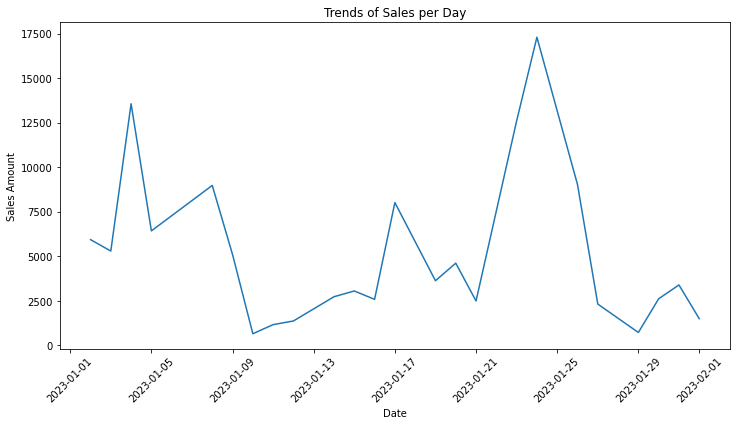

In [69]:
daily_sales = combined_data_payment_completed.groupby('date')['item payment amount(INR) '].sum().reset_index()


matplotlib.rcParams['figure.figsize']=(12,6)
plt.plot(daily_sales['date'], daily_sales['item payment amount(INR) '])
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Trends of Sales per Day')
plt.xticks(rotation=45)
plt.show()

In [70]:
combined_data_payment_completed['date']

0     2023-01-02
1     2023-01-02
2     2023-01-02
3     2023-01-02
4     2023-01-02
         ...    
446   2023-01-30
447   2023-01-30
448   2023-01-30
449   2023-01-30
450   2023-01-30
Name: date, Length: 451, dtype: datetime64[ns]

<Figure size 1440x2160 with 0 Axes>

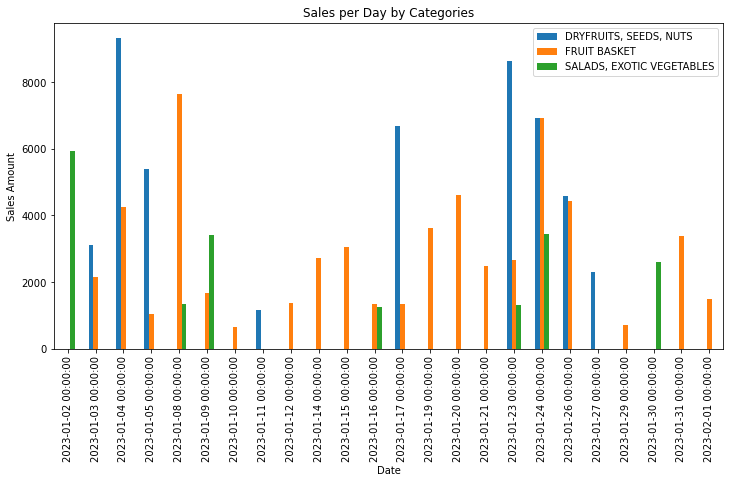

In [71]:
daily_category_sales = combined_data_payment_completed.groupby(['date', 'payment page title'])['item payment amount(INR) '].sum().reset_index()

pivot_data =daily_category_sales.pivot(index='date', columns='payment page title', values='item payment amount(INR) ')

plt.figure(figsize=(20, 30))
pivot_data.plot(kind='bar', stacked=False)
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Sales per Day by Categories')
plt.legend()
plt.show()


this trend shows that on 21 june sales where heighest and fruit baskets where sold the most

<Figure size 1440x2160 with 0 Axes>

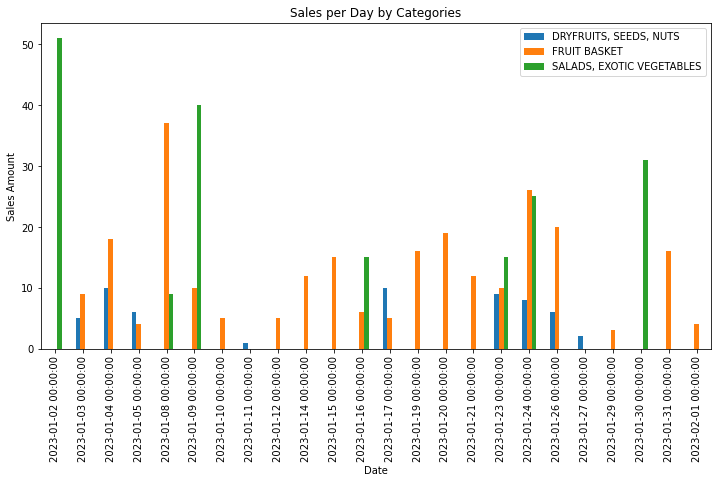

In [72]:
daily_category_sales = combined_data_payment_completed.groupby(['date', 'payment page title'])['item quantity'].sum().reset_index()

pivot_data =daily_category_sales.pivot(index='date', columns='payment page title', values='item quantity')

plt.figure(figsize=(20, 30))
pivot_data.plot(kind='bar', stacked=False)
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Sales per Day by Categories')
plt.legend()
plt.show()

This trend shows that on 15 june vegetables where sold in heighest quantity

### Dryfruits

In [73]:
pd.set_option('display.max_colwidth', 200)

In [74]:
dryfruits=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='DRYFRUITS, SEEDS, NUTS']
dryfruits_grouped=dryfruits.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()


In [75]:
dryfruits_unique_names=dryfruits.groupby('item name')['name'].unique().reset_index()

dryfruits_unique=dryfruits.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(dryfruits_unique,dryfruits_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,dryfruits_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount(INR) ','item quantity':'item sales quantity'})
merged_df

,item name,buyers count,sales amount(INR),item sales quantity,buyers Name
0,a2 gir cow ghee 500ml,1,1050.0,1.0,[namita sahni]
1,brazil nuts 200g,2,1120.0,2.0,"[amirbanu virji, namita sahni]"
2,cashews 500g,5,4100.0,5.0,"[amirbanu virji, indrani jafar, namita sahni, ami gumashta, yogesh thakkar]"
3,dried cranberries 500g,2,1900.0,2.0,"[yogesh thakkar, dinmeher bunshah]"
4,golden rasins 500g,2,1000.0,2.0,"[yogesh thakkar, jasma kapadia]"
5,honey awla 500g,3,1080.0,3.0,"[yogesh thakkar, michelle baptist, ami gumashta]"
6,jumbo anjeer 500g,3,2970.0,3.0,"[yogesh thakkar, jasma kapadia, brinda upadhyaya]"
7,macadamia nuts 200g,1,925.0,1.0,[michelle baptist]
8,makhana 250g,2,975.0,3.0,"[yogesh thakkar, indrani jafar]"
9,mamra badam 500g,4,7120.0,4.0,"[dinmeher bunshah, indrani jafar, namita sahni, ami gumashta]"


Table shows information regarding dry fruits categories item name,buyers count,sales amount,item sales quantity,buyers Name

In [76]:
dryfruit_date=dryfruits.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_dryfruits=dryfruits.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(dryfruit_date,unique_dryfruits, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR),item name
1,2023-01-04,9320.0,"[mamra badam 500g, plain pista 500g, cashews 500g, brazil nuts 200g, prunes 250g, pecan nuts 200g, walnuts 500g, premium almonds 500g, dried cranberries 500g]"
5,2023-01-23,8620.0,"[macadamia nuts 200g, premium jumbo dates 500g, walnuts 500g, honey awla 500g, brazil nuts 200g, a2 gir cow ghee 500ml, cashews 500g, mamra badam 500g]"
6,2023-01-24,6925.0,"[turkish apricot 200g, walnuts 500g, mixed seeds 250g, honey awla 500g, mamra badam 500g, cashews 500g, jumbo anjeer 500g]"
4,2023-01-17,6680.0,"[premium almonds 500g, prunes 250g, jumbo anjeer 500g, golden rasins 500g, turkish apricot 200g, walnuts 500g]"
2,2023-01-05,5390.0,"[cashews 500g, mamra badam 500g, makhana 250g, salted pista 500g, pine nuts 100g]"
7,2023-01-26,4590.0,"[walnuts 500g, premium jumbo dates 500g, prunes 250g, mixed seeds 250g, cashews 500g]"
0,2023-01-03,3125.0,"[dried cranberries 500g, golden rasins 500g, jumbo anjeer 500g, honey awla 500g, makhana 250g]"
8,2023-01-27,2310.0,[walnuts 500g]
3,2023-01-11,1155.0,[walnuts 500g]


Dryfruits sales this month

### Fruits

In [77]:
fruits=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='FRUIT BASKET']
fruits_grouped=fruits.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

fruits_unique_names=fruits.groupby('item name')['name'].unique().reset_index()

fruits_unique=fruits.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(fruits_unique,fruits_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,fruits_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

,item name,buyers count,sales amount,item sales quantity,buyers Name
0,avocados 2 pcs,6,7200.0,11.0,"[naina, yogesh thakkar, parul kumar, gayathri, jasma kapadia, dinmeher bunshah, nan]"
1,beauty pear 1kg,5,2400.0,8.0,"[parul kumar, indrani jafar, anubha, jasma kapadia, dinmeher bunshah]"
2,blueberries 2 box,11,9000.0,15.0,"[jaishankar vg, jasma kapadia, rachna jain, anubha, toral patel, gayathri, ushma, indrani jafar, simeen oshidar, dinmeher bunshah, asha gopalakrishnan, nan]"
3,delivery,20,555.0,37.0,"[naina, jaishankar vg, yogesh thakkar, jasma kapadia, rachna jain, mridula gupta, anubha, parul kumar, michelle baptist, kanchan samtani, toral patel, sonavi desai, indrani jafar, shwetha kallaje,..."
4,desi papaya 1pc,7,2100.0,21.0,"[naina, mridula gupta, parul kumar, sonavi desai, shwetha kallaje, ushma, dinmeher bunshah]"
5,elaichi banana 1dozen,3,472.0,4.0,"[parul kumar, dinmeher bunshah, naina]"
6,indian apples 1kg,5,1920.0,8.0,"[naina, mridula gupta, gayathri, dinmeher bunshah, yogesh thakkar]"
7,kiwi box,7,2600.0,13.0,"[jasma kapadia, rachna jain, anubha, toral patel, smita vats sharma, gayathri, dinmeher bunshah]"
8,malta oranges 1kg,8,1776.0,12.0,"[yogesh thakkar, anubha, toral patel, gayathri, sonavi desai, naina, dinmeher bunshah, asha gopalakrishnan]"
9,mosumbi local 1kg,5,1485.0,9.0,"[yogesh thakkar, mridula gupta, gayathri, kanchan samtani, dinmeher bunshah]"


In [78]:
fruits_date=fruits.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_fruits=fruits.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(fruits_date,unique_fruits, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR),item name
3,2023-01-08,7636.0,"[raipur guava 1kg, mosumbi local 1kg, desi papaya 1pc, strawberries 1 box, nagpur oranges 1kg, delivery, indian apples 1kg, pomegranate 1kg, blueberries 2 box, malta oranges 1kg, kiwi box, new zea..."
15,2023-01-24,6931.0,"[new zealand queen apples 1kg, delivery, blueberries 2 box, beauty pear 1kg, avocados 2 pcs, kiwi box, pineapple, red grapes 500g, watermelon, elaichi banana 1dozen, desi papaya 1pc, regular banan..."
12,2023-01-20,4608.0,"[elaichi banana 1dozen, beauty pear 1kg, pomegranate 1kg, sitafal 1kg, new zealand queen apples 1kg, avocados 2 pcs, raipur guava 1kg, delivery, desi papaya 1pc, kiwi box, strawberries 1 box]"
16,2023-01-26,4434.0,"[muskmelon 1pc, desi papaya 1pc, delivery, new zealand queen apples 1kg, strawberries 1 box, malta oranges 1kg, avocados 2 pcs, indian apples 1kg, red grapes 500g, sitafal 1kg, mosumbi local 1kg, ..."
1,2023-01-04,4240.0,"[avocados 2 pcs, nagpur oranges 1kg, delivery, desi papaya 1pc, regular banana 1 doz, pomegranate 1kg, indian apples 1kg, strawberries 1 box, blueberries 2 box, kiwi box, muskmelon 1pc]"
11,2023-01-19,3621.0,"[mosumbi local 1kg, indian apples 1kg, malta oranges 1kg, strawberries 1 box, delivery, avocados 2 pcs, kiwi box, pomegranate 1kg, sitafal 1kg, blueberries 2 box, desi papaya 1pc, regular banana 1..."
18,2023-01-31,3384.0,"[indian apples 1kg, watermelon, elaichi banana 1dozen, avocados 2 pcs, strawberries 1 box, pomegranate 1kg, malta oranges 1kg, delivery, desi papaya 1pc, red grapes 500g, new zealand queen apples ..."
8,2023-01-15,3045.0,"[sitafal 1kg, strawberries 1 box, delivery, kiwi box, avocados 2 pcs, pomegranate 1kg, nagpur oranges 1kg, watermelon, desi papaya 1pc, regular banana 1 doz, indian apples 1kg]"
7,2023-01-14,2723.0,"[beauty pear 1kg, elaichi banana 1dozen, pomegranate 1kg, sitafal 1kg, raipur guava 1kg, nagpur oranges 1kg, delivery, desi papaya 1pc, avocados 2 pcs, new zealand queen apples 1kg]"
14,2023-01-23,2660.0,"[blueberries 2 box, strawberries 1 box, delivery, red grapes 500g, pomegranate 1kg]"


### Vegetables

In [79]:
Vegetables=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='VEGETABLES']
Vegetables_grouped=Vegetables.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

Vegetables_unique_names=Vegetables.groupby('item name')['name'].unique().reset_index()

Vegetables_unique=Vegetables.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(Vegetables_unique,Vegetables_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,Vegetables_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

,buyers count,sales amount,item sales quantity,item name,buyers Name


In [80]:
Vegetables_date=Vegetables.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_Vegetables=Vegetables.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(Vegetables_date,unique_Vegetables, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,item payment amount(INR),date,item name


### Exotic vegetables

In [81]:
exotic_vegies=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='SALADS, EXOTIC VEGETABLES']
exotic_vegies_grouped=exotic_vegies.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

exotic_vegies_unique_names=exotic_vegies.groupby('item name')['name'].unique().reset_index()

exotic_vegies_unique=exotic_vegies.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(exotic_vegies_unique,exotic_vegies_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,exotic_vegies_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

,item name,buyers count,sales amount,item sales quantity,buyers Name
0,avocados 2 pcs,4,2550.0,4.0,"[kanchan samtani, indrani jafar, toral patel, dinmeher bunshah]"
1,baby spinach,4,660.0,6.0,"[indrani jafar, shradha goenka, parvin dumasia, dinmeher bunshah]"
2,babybella mushroom 2packs,3,525.0,3.0,"[toral patel, dinmeher bunshah, kerbi patel]"
3,babycorn 1pack,4,390.0,6.0,"[trupti, michelle baptist, dinmeher bunshah, ashish billimoria]"
4,broccoli 1pc,7,680.0,8.0,"[kerbi patel, jasma kapadia, indrani jafar, naina, shradha goenka, madhu, dinmeher bunshah]"
5,button white mushroom 2packs,4,700.0,5.0,"[jasma kapadia, michelle baptist, dinmeher bunshah, naina]"
6,celery 250g,4,280.0,4.0,"[trupti, naina, dinmeher bunshah, kerbi patel]"
7,cherry tomatoes 250g,7,850.0,10.0,"[kanchan samtani, indrani jafar, naina, shradha goenka, toral patel, parvin dumasia, dinmeher bunshah]"
8,delivery,16,495.0,33.0,"[kerbi patel, trupti, kanchan samtani, meenal, ashish billimoria, jasma kapadia, dinmeher bunshah, michelle baptist, indrani jafar, abha mehta, naina, shradha goenka, madhu, toral patel, parvin du..."
9,green zucchini 1pc,2,170.0,2.0,"[dinmeher bunshah, ashish billimoria]"


In [82]:
exotic_vegies_date=exotic_vegies.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_exotic_vegies=exotic_vegies.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(exotic_vegies_date,unique_exotic_vegies, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR),item name
0,2023-01-02,5930.0,"[broccoli 1pc, delivery, purple cabbage 1 pc, s romaine, red yellow capsicum 1pc, s swiss chard, s curl kale, s spicy mix, imported blueberries 2punnets, iceberg lettuce 1 pc, celery 250g, babycor..."
5,2023-01-24,3443.0,"[purple cabbage 1 pc, japanese cucumber 500g, green zucchini 1pc, s lettuce mix, yellow zucchini 1pc, s aragula, s curl kale, s summercrisp, delivery, cherry tomatoes 250g, s spicy mix, italian ba..."
2,2023-01-09,3405.0,"[s summercrisp, s butterhead, button white mushroom 2packs, italian basil, delivery, s spicy mix, s lettuce mix, cherry tomatoes 250g, red yellow capsicum 1pc, broccoli 1pc, celery 250g, baby spin..."
6,2023-01-30,2608.0,"[babycorn 1pack, s butterhead, s summercrisp, delivery, japanese cucumber 500g, celery 250g, s curl kale, s swiss chard, red yellow capsicum 1pc, babybella mushroom 2packs, s aragula, iceberg lett..."
1,2023-01-08,1338.0,"[cherry tomatoes 250g, red yellow capsicum 1pc, avocados 2 pcs, iceberg lettuce 1 pc, purple cabbage 1 pc, babybella mushroom 2packs, delivery, italian basil]"
4,2023-01-23,1315.0,"[delivery, s lettuce mix, s aragula, cherry tomatoes 250g, baby spinach, s romaine]"
3,2023-01-16,1245.0,"[baby spinach, cherry tomatoes 250g, s aragula, s spicy mix, delivery, s romaine, s lettuce mix, s summercrisp, s butterhead]"


In [83]:
combined_data_payment_completed['name'].unique()

array(['kerbi patel', 'trupti', 'kanchan samtani', 'meenal',
       'ashish billimoria', 'jasma kapadia', 'dinmeher bunshah',
       'michelle baptist', 'indrani jafar', 'naina', 'jaishankar vg',
       'yogesh thakkar', 'rachna jain', 'amirbanu virji', 'mridula gupta',
       'anubha', 'parul kumar', 'toral patel', 'sonavi desai',
       'shwetha kallaje', 'abha mehta', 'shradha goenka', 'madhu',
       'namita sahni', 'ami gumashta', 'brinda upadhyaya',
       'smita vats sharma', 'gayathri', 'ushma', 'parvin dumasia',
       'meher mirza', 'simeen oshidar', 'asha gopalakrishnan', nan],
      dtype=object)

#### Indrani's data 

In [84]:
indrani_data=combined_data_payment_completed[combined_data_payment_completed['name']=='indrani jafar']
indrani_data_grouped=indrani_data.groupby('item name')['item quantity','item payment amount(INR) '].sum().reset_index()
indrani_data_grouped.sort_values(by='item payment amount(INR) ',ascending=False)

,item name,item quantity,item payment amount(INR)
10,mamra badam 500g,1.0,1780.0
20,salted pista 500g,1.0,1450.0
5,cashews 500g,1.0,820.0
0,avocados 2 pcs,1.0,700.0
12,pine nuts 100g,1.0,690.0
9,makhana 250g,2.0,650.0
21,strawberries 1 box,3.0,615.0
3,blueberries 2 box,1.0,600.0
8,japanese cucumber 500g,4.0,320.0
2,beauty pear 1kg,1.0,300.0


In [85]:
indrani_orders = combined_data_payment_completed[(combined_data_payment_completed['name'] == 'indrani jafar')]



indrani_order_dates = indrani_orders.groupby('date')['item name'].unique().reset_index()
indrani_order_dates

,date,item name
0,2023-01-02,"[cherry tomatoes 250g, avocados 2 pcs, delivery, broccoli 1pc, japanese cucumber 500g]"
1,2023-01-05,"[cashews 500g, mamra badam 500g, makhana 250g, salted pista 500g, pine nuts 100g]"
2,2023-01-09,"[beauty pear 1kg, delivery, strawberries 1 box, nagpur oranges 1kg, raipur guava 1kg, broccoli 1pc, baby spinach, s romaine, s aragula, purple cabbage 1 pc, s butterhead, red yellow capsicum 1pc, ..."
3,2023-01-23,"[blueberries 2 box, strawberries 1 box, delivery, red grapes 500g]"


In [86]:
combined_data_payment_completed[combined_data_payment_completed['name']=='yogesh thakkar']

,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount(INR),total payment amount,email,date,time,year,day,month,name
60,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,strawberries 1 box,215.0,2.0,430.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
61,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,delivery,15.0,1.0,15.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
62,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,sitafal 1kg,260.0,1.0,260.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
63,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,mosumbi local 1kg,165.0,1.0,165.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
64,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,avocados 2 pcs,650.0,1.0,650.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
65,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,pomegranate 1kg,350.0,1.0,350.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
66,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,nagpur oranges 1kg,145.0,1.0,145.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
67,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,malta oranges 1kg,148.0,1.0,148.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
85,"DRYFRUITS, SEEDS, NUTS",03/01/2023 21:58:12,order_Kzlosb1Dp5Z33k,dried cranberries 500g,950.0,1.0,950.0,3125.0,yogesh.thakkar@gmail.com,2023-01-03,21:58:12,2023,3,1,yogesh thakkar
86,"DRYFRUITS, SEEDS, NUTS",03/01/2023 21:58:12,order_Kzlosb1Dp5Z33k,golden rasins 500g,500.0,1.0,500.0,3125.0,yogesh.thakkar@gmail.com,2023-01-03,21:58:12,2023,3,1,yogesh thakkar


# END